#Adaboost Algorithm from scratch


##**Objective:**  

---

To code the adaboost classifier algorithm from scratch to understand the indepth intuition of the algorithm.





##**Scope**:

---


To focus on working of algorithm and not on accuracy of the results.

##Algorithm:

---

1. Data preparation
2. Initialize weights for each row
3. Train decision stump (decision tree with max_depth =1)
4. Prediction
5. Calculate alpha (Model Weight)
6. Update weights
7. Sample selection for new model:
8. Re-training of n models


In [ ]:
from sklearn.datasets import make_gaussian_quantiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

###Making classification data

In [ ]:
x1, y1 = make_gaussian_quantiles(random_state=1, n_samples=60, n_classes=2, n_features = 2,  cov = 5)

In [ ]:
x2, y2 = make_gaussian_quantiles(random_state=1, n_samples=70, n_classes=2, n_features = 2,  mean = [10, 15], cov = 2)

In [ ]:
x= np.concatenate((x1, x2))
y= np.concatenate((y1, -y2+1))

In [ ]:
df = pd.DataFrame(np.column_stack((x, y)), columns = ["feature 1", "feature 2", "Target"])

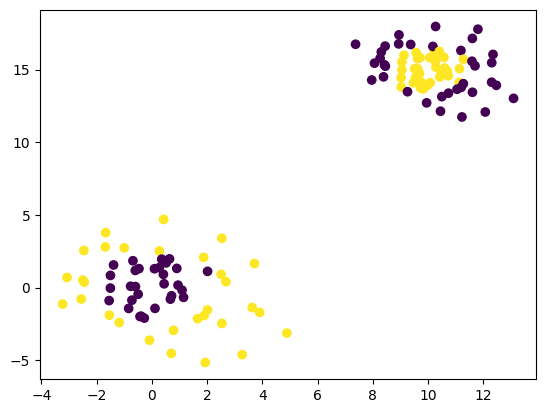

In [ ]:
plt.scatter(df["feature 1"], df["feature 2"], c = df["Target"])
plt.show()

###Coding Algorithm

In [ ]:
#Initialize weights

def initialize_weights(df):
  df["weights"] = 1/df.shape[0]
  return df

In [ ]:
#Function to train Decision stump

def decision_stump(df, alpha_list = 0):

  dt = DecisionTreeClassifier(max_depth = 1)
  dt.fit(df.iloc[:, :2], df.iloc[:, 2])
  return dt, df

In [ ]:
#Prediction

def predict():
  dt, df_1 = decision_stump(df)
  df_1["prediction"] = dt.predict(df.iloc[:, :2])
  return df_1

In [ ]:
#Assigning the weight (alpha) to the model.

def alpha_value():

  df = predict()

  sum = 0     #adding the weight of incorrect predictions

  for i, row in df.iterrows():
    if row.Target != row.prediction:
      sum = sum + row.weights

  if sum == 0 or sum == 1:
    return 0, df

  alpha = 0.5*np.log((1-sum)/sum)       #Calculating alpha (model weight)


  return alpha, df

In [ ]:
#Function to assign weights to each row for subsequent models.

def weight_assign():

  alpha, df = alpha_value()

  for index, row in df.iterrows(): # Iterate using iterrows to access rows by index
    if row.Target == row.prediction:
      df.loc[index, 'weights'] *= np.exp(-alpha) # Use index to update weights
    else:
      df.loc[index, 'weights'] *= np.exp(alpha) # Use index to update weights

  #Normalizing values of weights column
  df.weights /= df.weights.sum()

  #Upsampling
  df["Lower_Range"] = df.weights.cumsum() - df.weights
  df["Upper_Range"] = df.weights.cumsum()

  return alpha, df

In [ ]:
def new_model():

  alpha, df = weight_assign()

  new_index = []          #storing randomly selected rows

  for i in range(df.shape[0]):
    random_num = np.random.random()

    for index,row in df.iterrows():
      if row['Lower_Range'] < random_num <= row['Upper_Range']:         #Specifying ranges
        new_index.append(index)
  df = df.loc[new_index]
  return alpha, df

In [ ]:
def re_training(df, n_estimators= 2 ):       #Training 2 models

    #putting everything together
    df = initialize_weights(df)
    alpha_list = []

    for i in range(n_estimators):
        dt, df = decision_stump(df)  # Store the decision stump
        alpha, df = new_model()
        alpha_list.append(alpha)

    return alpha_list, df

In [ ]:
alpha, df = re_training(df)

In [ ]:
print("The alpha values are: ", alpha)        #Printing alpha (model weights)

print("******************************")

print(df)                                     #Printing dataframe

The alpha values are:  [np.float64(0.21881110987134894), np.float64(-1.7763568394002536e-15)]
******************************
     feature 1  feature 2  Target   weights  prediction  Lower_Range  \
85    9.623510  15.046124     1.0  0.006329         1.0     0.663068   
21    2.530400   3.398414     1.0  0.006329         1.0     0.164185   
127   9.021844  14.438906     1.0  0.006329         1.0     0.977538   
82    9.728704  13.744703     1.0  0.006329         1.0     0.644080   
28    3.901518  -1.702110     1.0  0.006329         1.0     0.225862   
..         ...        ...     ...       ...         ...          ...   
8     2.016018   1.123612     0.0  0.009804         1.0     0.057583   
49    0.357854   1.959173     0.0  0.009804         1.0     0.396997   
79    9.685581  14.716085     1.0  0.006329         1.0     0.625093   
12    0.671201  -0.787655     0.0  0.009804         1.0     0.093323   
109   9.051540  15.533956     1.0  0.006329         1.0     0.842765   

     Upper